<a href="https://colab.research.google.com/github/beantkapoor786/machine-learning-projects/blob/main/anti_microbial_peptides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we are going to generate a machine learning classification algorithm which will predict which amino acid sequences have anti-microbial properties. This notebook is inspired by "Data Professor" github ML projects. In his example, only amino acid composition was used to generate the model. In this notebook, we will use 5 different composition based features to build and predict the protein classes.

### Install Conda

In [34]:
# install conda on google colab
! pip install -q condacolab
import condacolab
condacolab.install()

In [35]:
! conda --version

### Download and Install Pfeature

In [36]:
! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip

In [ ]:
! unzip Pfeature.zip

Archive:  Pfeature.zip
replace Pfeature/PKG-INFO? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
%cd Pfeature

In [ ]:
! python setup.py install

/usr/local/lib/python3.10/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(


### Install CD-HIT

In [ ]:
! conda install -c bioconda cd-hit -y

### Load peptide dataset

In [ ]:
! wget https://raw.githubusercontent.com/dataprofessor/AMP/main/train_po.fasta

--2024-01-22 02:17:42--  https://raw.githubusercontent.com/dataprofessor/AMP/main/train_po.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52619 (51K) [text/plain]
Saving to: ‘train_po.fasta.1’

train_po.fasta.1    100%[===================>]  51.39K  --.-KB/s    in 0.04s   

2024-01-22 02:17:43 (1.30 MB/s) - ‘train_po.fasta.1’ saved [52619/52619]



In [ ]:
! wget https://raw.githubusercontent.com/dataprofessor/AMP/main/train_ne.fasta

--2024-01-22 02:17:43--  https://raw.githubusercontent.com/dataprofessor/AMP/main/train_ne.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57206 (56K) [text/plain]
Saving to: ‘train_ne.fasta.1’

train_ne.fasta.1    100%[===================>]  55.87K  --.-KB/s    in 0.04s   

2024-01-22 02:17:43 (1.28 MB/s) - ‘train_ne.fasta.1’ saved [57206/57206]



In [ ]:
! head train_po.fasta

In [ ]:
! tail train_po.fasta

>amp5_30_1525
SLGSFMKGVGKGLATVGKIVADQFGKLLEA
>amp5_30_1526
SWFSRTVHNVGNAVRKGIHAGQGVCSGLGL
>amp5_30_1527
TLQPPSALRRRHYHHALPPSRHYPGREAQA
>amp5_30_1528
TLRGDERILSILRHQNLLKELQDLALQGAK
>amp5_30_1529
VGECVRGRCPSGMCCSQFGYCGKGPKYCGR


In [ ]:
! head train_ne.fasta

>nonamp5_30_1
FPPWE
>nonamp5_30_2
FPPWM
>nonamp5_30_3
IEFFT
>nonamp5_30_4
RYLPT
>nonamp5_30_5
EDRTY


### Remove redundant sequences dataset using CD-HIT

Let's use the CD-HIT program to remove the redundant amino acid sequences from our data. The data that we have download has duplicate sequences. So, we will just keep unique sequences with a threshold similarity of 99%.

In [ ]:
! cd-hit -i train_po.fasta -o train_po_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1 (+OpenMP), May 15 2023, 22:49:31
Command: cd-hit -i train_po.fasta -o train_po_cdhit.txt -c
         0.99

Started: Mon Jan 22 02:17:44 2024
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 16M = 16M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 81M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 89796593

comparing sequences from          0  to       1445
.
     1445  finished       1337  clusters

Approximated maximum memory consumption: 81M
writing new database
writing clustering information
program completed !

Total CPU time 0.10


In [ ]:
! cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1 (+OpenMP), May 15 2023, 22:49:31
Command: cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c
         0.99

Started: Mon Jan 22 02:17:44 2024
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 16M = 16M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 81M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 89796051

comparing sequences from          0  to       1445
.
     1445  finished       1422  clusters

Approximated maximum memory consumption: 81M
writing new database
writing clustering information
program completed !

Total CPU time 0.10


In [ ]:
! grep -c ">" train_po.fasta

1529


In [ ]:
! grep -c ">" train_po_cdhit.txt

1337


In [ ]:
! grep -c ">" train_ne.fasta

1529


In [ ]:
! grep -c ">" train_ne_cdhit.txt

1422


### Calculate features using Pfeature library

In [ ]:
import pandas as pd

There are many composition based features of proteins which affect play a role in their anti-microbial properties. In this project, we will use 5 of those features. First, we will calculate Amino Acid Composition (AAC). Amino acid composition is the proportion of each amino acid to the total number of amino acids in the protein sequence.

In [ ]:
# amino acid composition (AAC)

from Pfeature.pfeature import *

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

Next feature is Dipeptide Composition (DPC). It is the proportion of two amino acids linked together by one peptide bond.

In [ ]:
# dipeptide composition (dpc)

def dpc(input):
  a = input.rstrip('txt')
  output = a + 'dpc.csv'
  df_out = dpc_wp(input, output, 1)
  df_in = pd.read_csv(output)
  return df_in

Next, we will calculate the physico-chemical properties of protein sequences. From the pfeature manual, they calculate -
* Positively Charged
* Negatively Charged
* Neutral Charge
* Polarity in residues
* Non-polarity in residues
* Aliphaticity
* Aromaticity
* Acidity
* Basicity
* Neutral (pH)
* Hydrophobicity
* Hydrophilicity
* Neutral towards water
* Hydroxylic
* Sulphur Content
* Tiny
* Small
* Large
* Cyclicity

In [ ]:
# physico-chemical properties

def pcp(input):
  a = input.rstrip('txt')
  output = a + 'pcp.csv'
  df_out = pcp_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

Fourth feature is Shannon Entropy at Protein level. It determines the probability distribution of each amino acid in protein sequence.

In [ ]:
# shannon entropy

def sep(input):
  a = input.rstrip('txt')
  output = a + 'sep.csv'
  df_out = sep_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

Last feature is Conjoint Triad Descriptors (CTD). These descriptors explains the features of protein pairs based on the classification of amino acids. The 20 amino acids were clustered into several classes according to their dipoles and volumes of the side chains.

In [ ]:
# conjoint traid calculation

def ctc(input):
  a = input.rstrip('txt')
  output = a + 'ctc.csv'
  df_out = ctc_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

In [ ]:
# create a function to automate feature calculation process for both positive and negative data
def feature_calc(po, ne, feature_name):
  # Calculate feature
  po_feature = feature_name(po)
  ne_feature = feature_name(ne)
  # Create class labels
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # Combine po and ne
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # Combine feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df

In [37]:
# AAC train po and ne
df_train_aac = feature_calc("train_po_cdhit.txt", "train_ne_cdhit.txt", aac)
df_train_aac

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09,positive
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00,positive
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,...,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00,negative
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,...,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00,negative
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,...,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67,negative
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,...,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33,negative


In [38]:
# DPC train po and ne
df_train_dpc = feature_calc("train_po_cdhit.txt", "train_ne_cdhit.txt", dpc)
df_train_dpc.pop('class')
df_train_dpc

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,0.0,0.0,0.0,0.0,10.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,6.9,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,3.45,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1418,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,3.45,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1419,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,0.00,3.45,...,0.00,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1420,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,3.45,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# SEP train po and ne
df_train_sep = feature_calc("train_po_cdhit.txt", "train_ne_cdhit.txt", sep)
df_train_sep.pop('class')
df_train_sep

,SEP
0,2.845
1,1.686
2,3.096
3,3.096
4,2.914
...,...
1417,3.257
1418,3.498
1419,3.514
1420,3.761


In [40]:
# PCP train po and ne
df_train_pcp = feature_calc("train_po_cdhit.txt", "train_ne_cdhit.txt", pcp)
df_train_pcp.pop('class')
df_train_pcp

,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,PCP_BS,...,PCP_SA_EX,PCP_SA_IN,PCP_TN,PCP_SM,PCP_LR,PCP_Z1,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5
0,0.000,0.091,0.909,0.091,0.727,0.636,0.091,0.182,0.091,0.000,...,0.273,0.182,0.364,0.818,0.182,-0.345,-0.827,0.489,-0.479,0.230
1,0.000,0.091,0.909,0.909,0.000,0.000,0.000,0.000,0.091,0.000,...,0.091,0.364,0.727,0.909,0.091,1.312,-1.478,2.019,-0.696,-1.419
2,0.091,0.273,0.636,0.000,0.636,0.455,0.182,0.091,0.273,0.091,...,0.455,0.364,0.091,0.455,0.545,-0.231,-0.213,0.410,-0.286,0.289
3,0.091,0.182,0.727,0.000,0.636,0.455,0.182,0.091,0.182,0.091,...,0.455,0.364,0.091,0.455,0.545,-0.315,-0.150,0.329,-0.167,0.075
4,0.000,0.273,0.727,0.000,0.636,0.364,0.182,0.182,0.273,0.000,...,0.545,0.273,0.091,0.455,0.545,-0.326,0.174,0.717,-0.619,0.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,0.267,0.067,0.667,0.067,0.567,0.433,0.033,0.100,0.067,0.267,...,0.433,0.100,0.267,0.400,0.600,0.193,-0.368,-0.596,0.286,0.145
1418,0.167,0.033,0.800,0.200,0.600,0.500,0.033,0.067,0.033,0.167,...,0.300,0.200,0.333,0.433,0.567,0.058,-1.056,-0.479,-0.250,0.257
1419,0.100,0.033,0.867,0.400,0.433,0.433,0.067,0.067,0.033,0.100,...,0.233,0.267,0.433,0.700,0.300,0.092,-1.202,0.436,-0.352,-0.416
1420,0.167,0.067,0.767,0.167,0.433,0.333,0.033,0.100,0.067,0.167,...,0.367,0.200,0.133,0.500,0.500,0.271,0.178,-0.369,-0.252,-0.074


In [41]:
# CTC train po and ne
df_train_ctc = feature_calc("train_po_cdhit.txt", "train_ne_cdhit.txt", ctc)
df_train_ctc.pop('class')
df_train_ctc

,CTC_111,CTC_112,CTC_113,CTC_114,CTC_115,CTC_116,CTC_117,CTC_121,CTC_122,CTC_123,...,CTC_765,CTC_766,CTC_767,CTC_771,CTC_772,CTC_773,CTC_774,CTC_775,CTC_776,CTC_777
0,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,0.0,0.000,0.0,0.0,0.0,0.0,0.0,1.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1418,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1419,0.0,0.000,0.5,0.0,0.0,0.0,0.0,0.0,1.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1420,0.0,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# concat all different feature dataframes in one
df_train = pd.concat([df_train_aac, df_train_dpc, df_train_sep, df_train_pcp, df_train_ctc], axis=1)
df_train

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,CTC_765,CTC_766,CTC_767,CTC_771,CTC_772,CTC_773,CTC_774,CTC_775,CTC_776,CTC_777
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data pre-processing

In [43]:
# Assigns the features to X and class label to Y
X = df_train.drop('class', axis=1)
y = df_train['class'].copy()

In [44]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})

In [45]:
X.shape

(2759, 794)

Only keep those columns whose variance is equal to or more than 0.1

In [46]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,PCP_Z4,PCP_Z5,CTC_111,CTC_112,CTC_121,CTC_122,CTC_211,CTC_221,CTC_222,CTC_225
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,-0.479,0.230,0.0,1.000,0.0,0.000,0.000,0.000,0.0,0.0
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.696,-1.419,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,-0.286,0.289,0.0,1.000,0.0,0.000,1.000,0.000,0.0,0.0
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,-0.167,0.075,0.0,1.000,0.0,0.000,1.000,0.000,0.0,0.0
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,-0.619,0.080,0.0,0.000,0.0,0.000,0.000,1.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,...,0.286,0.145,0.0,0.000,1.0,0.000,0.000,0.000,0.0,0.0
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,...,-0.250,0.257,0.0,0.000,0.0,1.000,0.000,0.000,0.0,1.0
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,...,-0.352,-0.416,0.0,0.000,0.0,1.000,0.000,0.500,0.0,0.5
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,...,-0.252,-0.074,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0


We lose 365 columns

Split this data into train (80%) and test (20%) for Random Forest Classifier algorithm

In [47]:
# Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =11, stratify=y)

### RANDOM FOREST

In [79]:
# Build random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

#### Model performance

In [80]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [82]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.7608695652173914

In [83]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[218,  67],
       [ 65, 202]])

That means that our model was able to correctly predict 218 positive anti-microbial proteins and 202 negative anti-microbial proteins. However, it made 67 false positives and 65 false negative predictions.

In [101]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report)
f.close()

#### Feature importance

In [92]:
# Retrieve feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# Retrieve feature names
feature_names = pd.Series(X2.columns, name = 'Feature')

In [93]:
# Combine feature names and Gini values into a Dataframe
df_imp = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df_imp

,Feature,Gini
0,AAC_A,0.010046
1,AAC_C,0.011823
2,AAC_D,0.029659
3,AAC_E,0.022297
4,AAC_F,0.007623
...,...,...
425,CTC_122,0.014413
426,CTC_211,0.012064
427,CTC_221,0.015292
428,CTC_222,0.014326


Text(0.5, 0, 'Feature Importance')

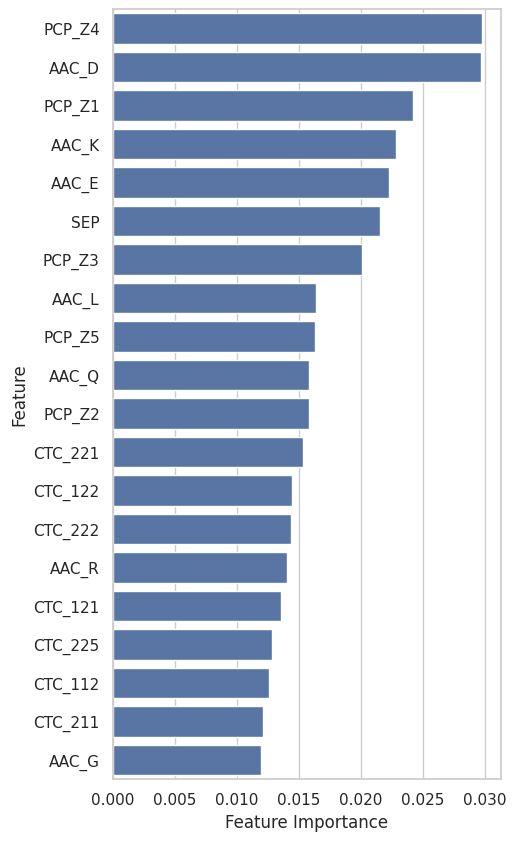

In [95]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df_imp.sort_values('Gini', ascending=False)[:20] # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")

This plot shows that the top five features that determine whether a protein has anti-microbial properties or not are
1. PCP_Z4 - electronegativity, heat of formation, electrophilicity and hardness
2. AAC_D - Amino acid composition of Aspartic acid
3. PCP_Z1 - Lipophilicity - the ability of a molecule to mix with an oily phase rather than with water
4. AAC_K - Amino acid composition of Lysine
5. AAC_E - Amino acid composition of Gltumatic acid

**CONCLUSION** -

In this project, we built a random forest classifier model to predict which proteins might have anti-microbial properties with an accuracy score of 76%. We only used 5 protein features however there are many more properties that can play a role mentioned in [Pfeature manual](https://webs.iiitd.edu.in/raghava/pfeature/Pfeature_Manual.pdf). Additionally, it would be interesting to see how gradient boosting models would perform on this dataset.